In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('data/dados_brutos.csv')

In [3]:
dados.head()

,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


In [4]:
##Obtendo informaçoes dos tipos de dados
dados.info()

##Verificando se existem dados nulos e removendo-os
dados.isnull().sum()
#dados_nulos = dados[dados.isnull().any(axis=1)]
dados_animes = dados.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [5]:
dados_animes.drop(['synopsis', 'image_url'], axis=1, inplace=True)

C:\Users\miche\AppData\Local\Temp\ipykernel_13012\2367478062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_animes.drop(['synopsis', 'image_url'], axis=1, inplace=True)


In [6]:
#Formatando as datas para o tipo correto
dados_animes['start_date'] = pd.to_datetime(dados_animes['start_date'])
dados_animes['end_date'] = pd.to_datetime(dados_animes['end_date'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


C:\Users\miche\AppData\Local\Temp\ipykernel_13012\4040039677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_animes['start_date'] = pd.to_datetime(dados_animes['start_date'])
C:\Users\miche\AppData\Local\Temp\ipykernel_13012\4040039677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_animes['end_date'] = pd.to_datetime(dados_animes['end_date'])


In [7]:
#Criando uma coluna apenas com o ano do lançamento
dados_animes['release_year'] = dados_animes['start_date'].dt.year

C:\Users\miche\AppData\Local\Temp\ipykernel_13012\4099253551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_animes['release_year'] = dados_animes['start_date'].dt.year


In [8]:
##Trabalhando apenas com animes dos anos 2000 em diante
animes_modernos = dados_animes[(dados_animes['release_year'] >= 2000) & (dados_animes['release_year'] <= 2024)].copy()



In [9]:
animes_tv = animes_modernos[animes_modernos['type'] == 'TV'].copy()
##Analisando a quantidade de animes por ano para gráfico
contagem_animes_anuais = animes_tv['release_year'].value_counts().sort_index()
contagem_animes_anuais

release_year
2000     51
2001     69
2002     69
2003     90
2004    106
2005    104
2006    146
2007    127
2008    128
2009    115
2010     97
2011    123
2012    135
2013    147
2014    160
2015    154
2016    174
2017    159
2018    186
2019    136
2020    131
2021    158
2022    160
2023    189
2024    201
Name: count, dtype: int64

Gerando os gráficos para visualização da quantidade de animes lançados nos anos 2000 até 2024

C:\Users\miche\AppData\Local\Temp\ipykernel_13012\3621150150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = animes_tv, x = 'release_year', palette = 'mako_r')


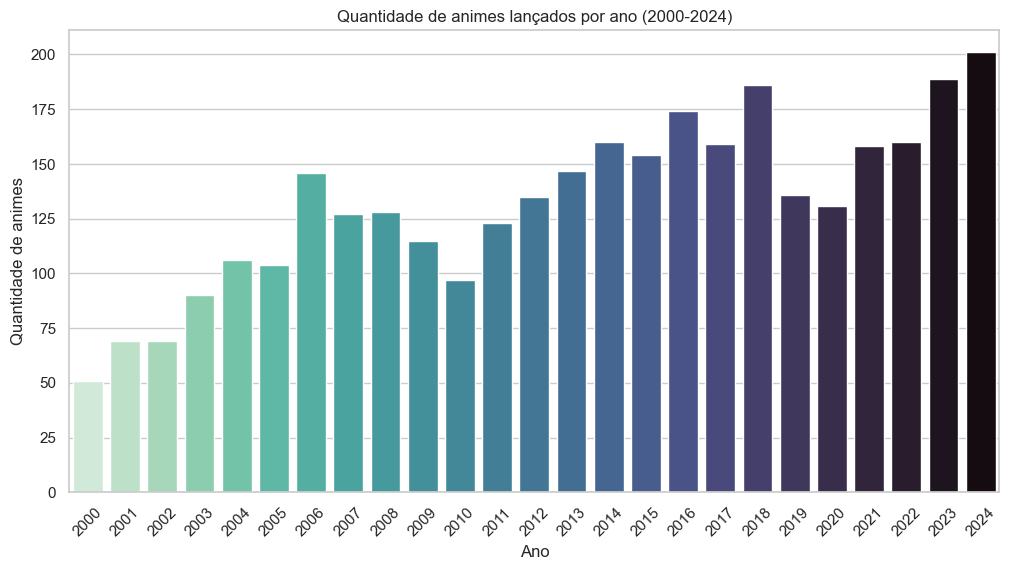

In [10]:
##Gráfico em barras para visualização
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))

sns.countplot(data = animes_tv, x = 'release_year', palette = 'mako_r')

plt.title('Quantidade de animes lançados por ano (2000-2024)')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de animes', fontsize=12)
plt.xticks(rotation=45)

plt.show()

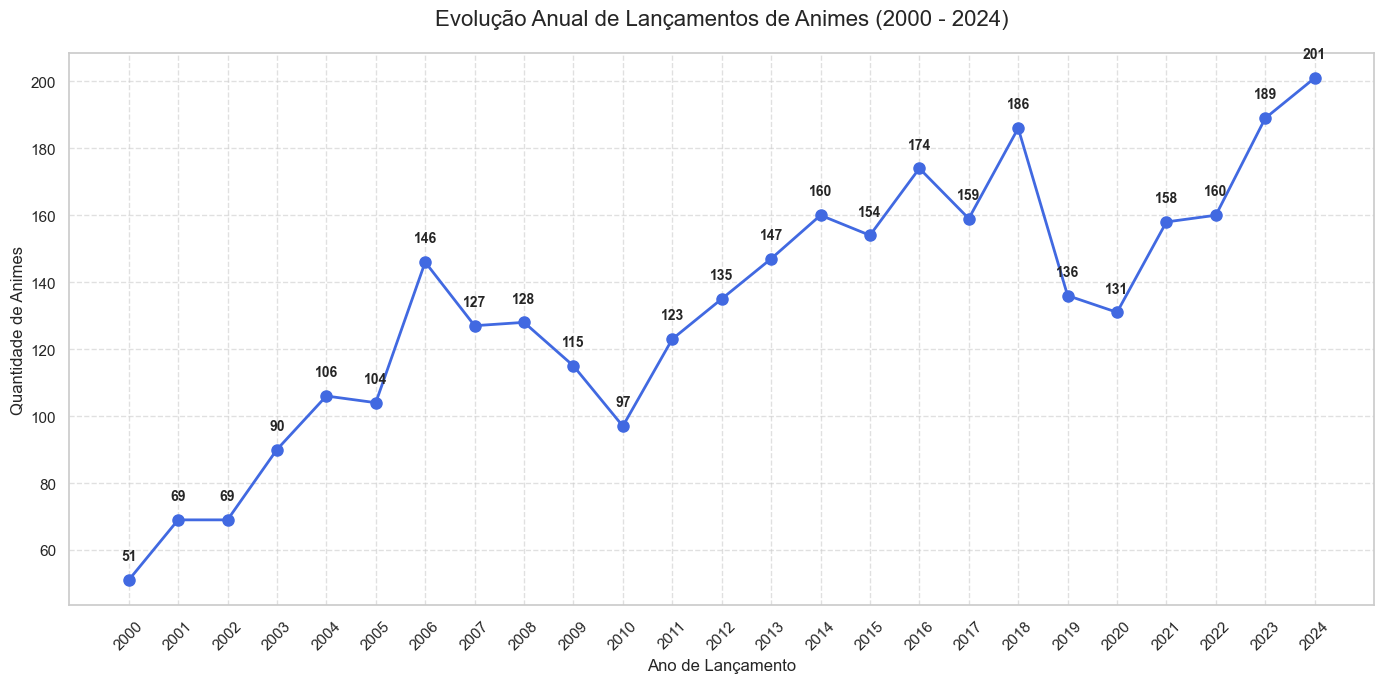

In [11]:
#Gráfico em linhas

#Configurando o estilo e o tamanho do gráfico
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

#Criando o gráfico de linha
# marker='o' adiciona as "bolinhas" em cada ano
plt.plot(contagem_animes_anuais.index, contagem_animes_anuais.values,
         marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8)

#Percorremos cada ponto do gráfico para colocar o texto do valor
for x, y in zip(contagem_animes_anuais.index, contagem_animes_anuais.values):
    plt.text(x, y + 5, str(int(y)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Personalização final
plt.title('Evolução Anual de Lançamentos de Animes (2000 - 2024)', fontsize=16, pad=20)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Quantidade de Animes', fontsize=12)
plt.xticks(contagem_animes_anuais.index, rotation=45) # Garante que todos os anos apareçam no eixo X
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Ajusta as margens para não cortar os nomes
plt.show()

Gráfico dos 10 animes mais bem avaliados no ano de 2024

C:\Users\miche\AppData\Local\Temp\ipykernel_13012\1871485324.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10, x = 'score', y = 'title', palette = 'viridis')


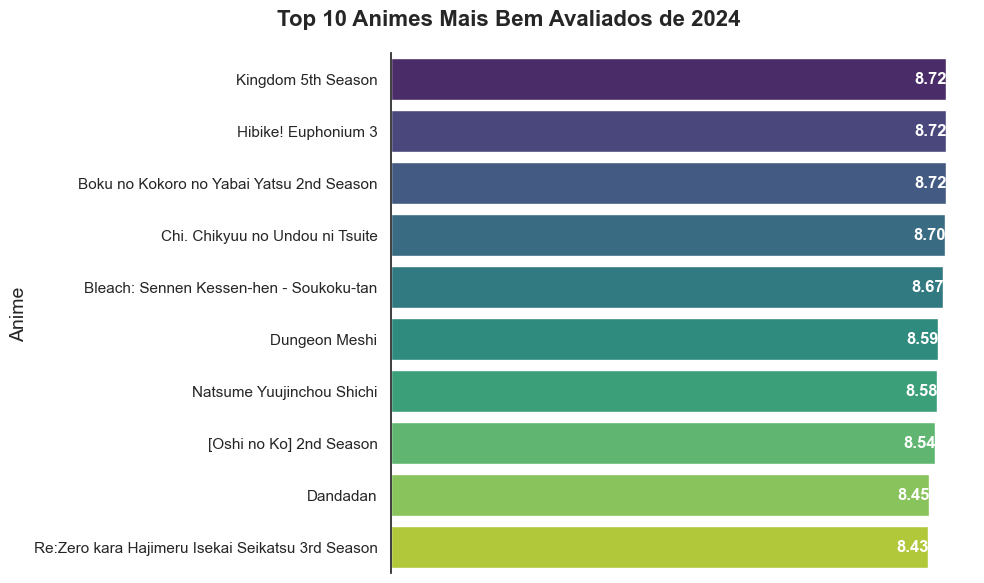

In [12]:
#Primeiro filtrar os animes do ano de 2024
animes_2024 = animes_tv[animes_tv['release_year'] == 2024]

#Coletar os 10 melhores avaliados
top_10 = animes_2024.sort_values(by='score', ascending=False).head(10)

#Configurando o estilo
plt.figure(figsize=(10,6))
sns.set_theme(style='white')

#Criando um gráfico de barras
ax = sns.barplot(data = top_10, x = 'score', y = 'title', palette = 'viridis')

#Adicionando a nota dentro da barra
for i, valor in enumerate(top_10['score']):
    plt.text(valor - 0.5, i, f'{valor:.2f}', va='center', color='white', fontweight='bold')

#Personalizando
ax.set_title('Top 10 Animes Mais Bem Avaliados de 2024', fontsize=16, pad=20, x = 0.6, loc = 'right', fontweight='bold')

plt.ylabel('Anime', fontsize=14)
plt.xticks([])

ax.set(xlabel='')

sns.despine(bottom=True)

plt.tight_layout()
plt.show()

Preparando os dados para o SQL

In [13]:
animes_sql = animes_tv[['anime_id','title','score','popularity','release_year']].copy()
animes_sql.to_csv('data/animessql.csv', index=False)

In [14]:
#Exemplo de como adicionar os dados ao MySQL por exemplo. Altere os dados das variáveis!!!
from sqlalchemy import create_engine
from urllib.parse import quote_plus

usuario = "root"
senha = "senha"
host = "localhost"
porta = 3306
banco = "nome_do_banco"

senha_codificada = quote_plus(senha)

engine = create_engine(
    f"mysql+pymysql://{usuario}:{senha_codificada}@{host}:{porta}/{banco}"
)


In [15]:
with engine.connect() as conn:
    print("Conectado com sucesso!")


RuntimeError: 'cryptography' package is required for sha256_password or caching_sha2_password auth methods